In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Bengali_db

/content/drive/My Drive/Bengali_db


In [0]:
cp ttdata.zip /content

In [4]:
cd /content/

/content


In [5]:
!unzip ttdata.zip

Archive:  ttdata.zip
   creating: data/
   creating: data/train/
   creating: data/train/Bengali Female/
  inflating: data/train/Bengali Female/_2.jpg  
  inflating: data/train/Bengali Female/_50451259_nuzratjahan1.jpg  
  inflating: data/train/Bengali Female/_64627012_mentor.jpg  
  inflating: data/train/Bengali Female/_79533541_1c143da8-1013-4f12-b2db-becf34e8cd71.jpg  
  inflating: data/train/Bengali Female/_103791366_img_5716.jpg  
  inflating: data/train/Bengali Female/_105687929_hi052405936-1.jpg  
  inflating: data/train/Bengali Female/_106346936_img_4700.jpg  
  inflating: data/train/Bengali Female/_106347044_img_4728.jpg  
  inflating: data/train/Bengali Female/_106347681_img_5049.jpg  
  inflating: data/train/Bengali Female/0be4fc0abadf850c1246a82f76b22f14--artists.jpg  
  inflating: data/train/Bengali Female/0ce2459358a0ae9ec3564f10a7a82ef3--west-bengal-indian-beauty.jpg  
  inflating: data/train/Bengali Female/0ebbda56ff10ad3013c762b584cfb02f.jpg  
  inflating: data/train/B

In [6]:
cd data/

/content/data


In [7]:
ls

test/  train/


In [8]:
 import numpy as np  
 from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
 from keras.models import Sequential  
 from keras.layers import Dropout, Flatten, Dense  
 from keras import applications  
 from keras.utils.np_utils import to_categorical  
 import matplotlib.pyplot as plt  
 import math  
 import cv2  

Using TensorFlow backend.


In [0]:
 # dimensions of our images.  
 img_width, img_height = 224, 224  
   
 top_model_weights_path = 'bottleneck_fc_model.h5'  
 train_data_dir = 'train'  
 validation_data_dir = 'test'  
   
 # number of epochs to train top model  
 epochs = 50  
 # batch size used by flow_from_directory and predict_generator  
 batch_size = 16  

In [10]:
model = applications.VGG16(include_top=False, weights='imagenet')

W0811 05:54:36.658969 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 05:54:36.707149 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 05:54:36.716720 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 05:54:36.759525 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0811 05:54:38.598052 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 05:54:38.599466 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [11]:
 datagen = ImageDataGenerator(rescale=1. / 255)  
   
 generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
 nb_train_samples = len(generator.filenames)  
 num_classes = len(generator.class_indices)  
   
 predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
 bottleneck_features_train = model.predict_generator(  
     generator, predict_size_train)  
   
 np.save('bottleneck_features_train.npy', bottleneck_features_train)  

Found 3443 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (139489119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33685504 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 47185920 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " S

In [12]:
 generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
 nb_validation_samples = len(generator.filenames)  
   
 predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
 bottleneck_features_validation = model.predict_generator(  
     generator, predict_size_validation)  
   
 np.save('bottleneck_features_validation.npy', bottleneck_features_validation)  

Found 895 images belonging to 2 classes.


In [16]:
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
 # load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
 # get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
 # convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)  

Found 3443 images belonging to 2 classes.


In [18]:
 generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 895 images belonging to 2 classes.


In [19]:
 model = Sequential()  
 model.add(Flatten(input_shape=train_data.shape[1:]))  
 model.add(Dense(256, activation='relu'))  
 model.add(Dropout(0.5))  
 model.add(Dense(num_classes, activation='sigmoid'))  
   
 model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
 history = model.fit(train_data, train_labels,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels))  
   
 model.save_weights(top_model_weights_path)  
   
 (eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)

 print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
 print("[INFO] Loss: {}".format(eval_loss))  

W0811 06:00:40.345214 140526166468480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0811 06:00:40.372100 140526166468480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 06:00:40.487310 140526166468480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3443 samples, validate on 895 samples
Epoch 1/50
3443/3443 [==============================] - 3s 805us/step - loss: 0.6985 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.4693
Epoch 2/50
3443/3443 [==============================] - 2s 466us/step - loss: 0.6931 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.4693
Epoch 3/50
3443/3443 [==============================] - 2s 477us/step - loss: 0.6932 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.4693
Epoch 4/50
3443/3443 [==============================] - 2s 458us/step - loss: 0.6931 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.4693
Epoch 5/50
3443/3443 [==============================] - 2s 458us/step - loss: 0.6931 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.4693
Epoch 6/50
3443/3443 [==============================] - 2s 460us/step - loss: 0.6931 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.4693
Epoch 7/50
3443/3443 [==============================] - 2s 458us/step - loss: 0.6931 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.4693
E

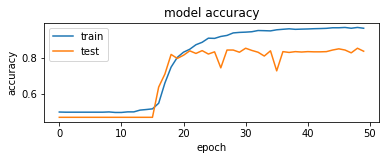

In [23]:
 plt.figure(1)  
   
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(history.history['acc'])  
 plt.plot(history.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
   


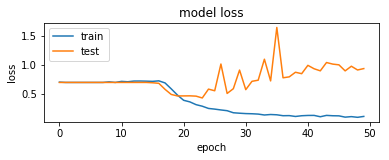

In [25]:
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [27]:
#lets make prediction!

image_path = 'test/Bengali Female/000_Hkg7579546.jpg'  
   
orig = cv2.imread(image_path)  
   
print("[INFO] loading and preprocessing image...")  
image = load_img(image_path, target_size=(224, 224))  
image = img_to_array(image)  
   
 # important! otherwise the predictions will be '0'  
image = image / 255  
   
image = np.expand_dims(image, axis=0) 




[INFO] loading and preprocessing image...


In [0]:
# build the VGG16 network  
 model = applications.VGG16(include_top=False, weights='imagenet')  
   
 # get the bottleneck prediction from the pre-trained VGG16 model  
 bottleneck_prediction = model.predict(image)  
   
 # build top model  
 model = Sequential()  
 model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))  
 model.add(Dense(256, activation='relu'))  
 model.add(Dropout(0.5))  
 model.add(Dense(num_classes, activation='sigmoid'))  
   
 model.load_weights(top_model_weights_path)  
   
 # use the bottleneck prediction on the top model to get the final classification  
 class_predicted = model.predict_classes(bottleneck_prediction)  
   

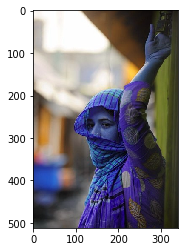

In [32]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("test/Bengali Female/000_Hkg7579546.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()
